In [ ]:
from PIL import Image
import numpy as np
import cv2

def create_mask_and_inverse_mask(image_path):
    # 이미지를 불러오고 알파 채널을 추출
    img = Image.open(image_path).convert("RGBA")
    alpha_channel = np.array(img.getchannel("A"))

    # 알파 채널을 이용하여 마스크 생성 (알파 값이 0보다 큰 부분은 흰색)
    mask = cv2.threshold(alpha_channel, 0, 255, cv2.THRESH_BINARY)[1]

    # 역마스크 생성 (마스크의 반전)
    inverse_mask = cv2.bitwise_not(mask)

    return mask, inverse_mask

def save_images(mask, inverse_mask, mask_path, inverse_mask_path):
    # 마스크와 역마스크를 이미지로 저장
    cv2.imwrite(mask_path, mask)
    cv2.imwrite(inverse_mask_path, inverse_mask)

# if __name__ == "__main__":
#     image_path = 'input_image.png'  # 알파 채널이 포함된 이미지 파일 경로
#     mask_path = 'mask.png'          # 마스크를 저장할 경로
#     inverse_mask_path = 'inverse_mask.png'  # 역마스크를 저장할 경로

#     mask, inverse_mask = create_mask_and_inverse_mask(image_path)
#     save_images(mask, inverse_mask, mask_path, inverse_mask_path)


image_path = 'screenshot.png'  # 알파 채널이 포함된 이미지 파일 경로
mask_path = 'mask.png'          # 마스크를 저장할 경로
inverse_mask_path = 'inverse_mask.png'  # 역마스크를 저장할 경로

mask, inverse_mask = create_mask_and_inverse_mask(image_path)
save_images(mask, inverse_mask, mask_path, inverse_mask_path)

In [17]:
from PIL import Image
import numpy as np
import cv2 as cv


mask = np.zeros(img.shape[:2], dtype=np.uint8)
cv2.circle(mask, (150,140), 100, (255), -1)
#cv2.circle(대상이미지, (원점x, 원점y), 반지름, (색상), 채우기)

#--③ 마스킹
masked = cv2.bitwise_and(img, img, mask=mask)



img = cv.imread('goblin_text.png', cv.IMREAD_UNCHANGED)
print(type(img), img.shape)
img[:,:,0] = 0 #  B없애기
print(img[:,:,3].shape)
img2 = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
print(type(img), img.shape)
ret, img_bin = cv.threshold(img2, 170, 255, cv.THRESH_BINARY)
cv.bitwise_not
print(ret)
img[:,:,3] = img_bin
print(img[:,:,3], img_bin.shape)
cv.imshow('image_name', img_bin)
print(img_bin.shape)
cv.imshow('image_name2', img)

cv.waitKey(0) # 0 무한대기, 1 ms 후에 넘어감
cv.destroyAllWindows() # 모든 화면 닫기

<class 'numpy.ndarray'> (39, 64, 4)
(39, 64)
<class 'numpy.ndarray'> (39, 64, 4)
170.0
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] (39, 64)
(39, 64)


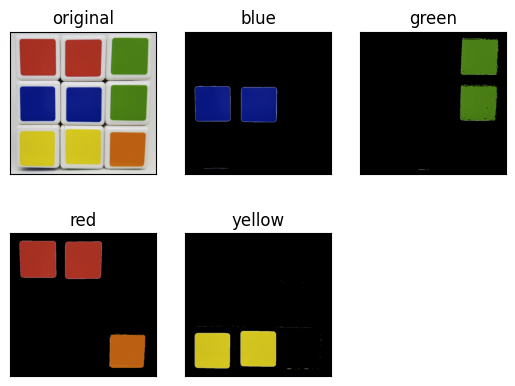

In [18]:
import cv2
import numpy as np
import matplotlib.pylab as plt
# C:\source\insightbook.opencv_project_python\img\cube.jpg
#--① 큐브 영상 읽어서 HSV로 변환
img = cv2.imread(r"C:\source\insightbook.opencv_project_python\img\cube.jpg")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#--② 색상별 영역 지정
blue1 = np.array([90, 50, 50])
blue2 = np.array([120, 255,255])
green1 = np.array([45, 50,50])
green2 = np.array([75, 255,255])
red1 = np.array([0, 50,50])
red2 = np.array([15, 255,255])
red3 = np.array([165, 50,50])
red4 = np.array([180, 255,255])
yellow1 = np.array([20, 50,50])
yellow2 = np.array([35, 255,255])

# --③ 색상에 따른 마스크 생성
mask_blue = cv2.inRange(hsv, blue1, blue2)
mask_green = cv2.inRange(hsv, green1, green2)
mask_red = cv2.inRange(hsv, red1, red2)
mask_red2 = cv2.inRange(hsv, red3, red4)
mask_yellow = cv2.inRange(hsv, yellow1, yellow2)

#--④ 색상별 마스크로 색상만 추출
res_blue = cv2.bitwise_and(img, img, mask=mask_blue)
res_green = cv2.bitwise_and(img, img, mask=mask_green)
res_red1 = cv2.bitwise_and(img, img, mask=mask_red)
res_red2 = cv2.bitwise_and(img, img, mask=mask_red2)
res_red = cv2.bitwise_or(res_red1, res_red2)
res_yellow = cv2.bitwise_and(img, img, mask=mask_yellow)

#--⑤ 결과 출력
imgs = {'original': img, 'blue':res_blue, 'green':res_green, 
                            'red':res_red, 'yellow':res_yellow}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,3, i+1)
    plt.title(k)
    plt.imshow(v[:,:,::-1])
    plt.xticks([]); plt.yticks([])
plt.show()


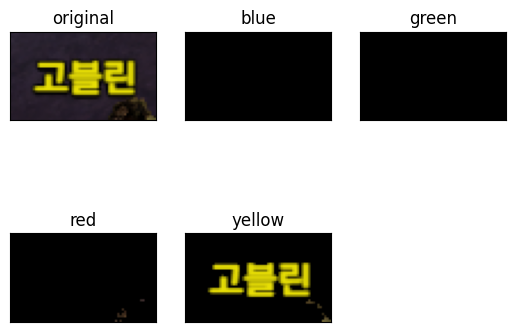

In [19]:
import cv2
import numpy as np
import matplotlib.pylab as plt
# C:\source\insightbook.opencv_project_python\img\cube.jpg
#--① 큐브 영상 읽어서 HSV로 변환
img = cv2.imread(r"C:\source\exercise\opencv_study\goblin_text.png")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#--② 색상별 영역 지정
blue1 = np.array([90, 50, 50])
blue2 = np.array([120, 255,255])
green1 = np.array([45, 50,50])
green2 = np.array([75, 255,255])
red1 = np.array([0, 50,50])
red2 = np.array([15, 255,255])
red3 = np.array([165, 50,50])
red4 = np.array([180, 255,255])
yellow1 = np.array([20, 50,50])
yellow2 = np.array([35, 255,255])

# --③ 색상에 따른 마스크 생성
mask_blue = cv2.inRange(hsv, blue1, blue2)
mask_green = cv2.inRange(hsv, green1, green2)
mask_red = cv2.inRange(hsv, red1, red2)
mask_red2 = cv2.inRange(hsv, red3, red4)
mask_yellow = cv2.inRange(hsv, yellow1, yellow2)

#--④ 색상별 마스크로 색상만 추출
res_blue = cv2.bitwise_and(img, img, mask=mask_blue)
res_green = cv2.bitwise_and(img, img, mask=mask_green)
res_red1 = cv2.bitwise_and(img, img, mask=mask_red)
res_red2 = cv2.bitwise_and(img, img, mask=mask_red2)
res_red = cv2.bitwise_or(res_red1, res_red2)
res_yellow = cv2.bitwise_and(img, img, mask=mask_yellow)

#--⑤ 결과 출력
imgs = {'original': img, 'blue':res_blue, 'green':res_green, 
                            'red':res_red, 'yellow':res_yellow}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,3, i+1)
    plt.title(k)
    plt.imshow(v[:,:,::-1])
    plt.xticks([]); plt.yticks([])
plt.show()


In [54]:
        
import cv2 as cv
from win32api import GetSystemMetrics
screen_width = GetSystemMetrics(0)
screen_height = GetSystemMetrics(1)
# image_height, image_width = image.shape[:2]

img = cv.imread(r'C:\source\exercise\opencv_study\screenshot.png')
image_name = 'dk'
cv.imshow(image_name, img)
image_height, image_width = img.shape[:2]
x, y = (screen_width // 2) - image_width // 2, screen_height // 2 - image_height // 2
cv.moveWindow(image_name, x, y) 
color = (0,0,255)

sx, sy = (screen_width // 2), screen_height // 2 # 스타트 지점
ex, ey = sx + 100, sy + 100 // 2 # 엔드 지점


def draw_ract(sx, sy, ex, ey, image, image_name):
    img_copy = image.copy()  # 이미지 복사
    cv.rectangle(img_copy, (sx, sy), (ex, ey), (0, 0, 255), 1)
    cv.imshow(image_name, img_copy)

def onMouse(event, x, y, flag, param):
    global sx, sy, ex, ey
    if event == cv.EVENT_LBUTTONDOWN:
        # cv.circle(img, (x,y), 50, color, 5) # -1 채움 , 기본적으로 선 굵기
        # cv.imshow(image_name, img)
        sx, sy = x, y
        print(event, x, y)
    elif event == cv.EVENT_RBUTTONDOWN:
        cv.putText(img, 'cho young hoon', (x, y), cv.FONT_HERSHEY_PLAIN, fontScale=5, color=color, thickness=5) 
        cv.imshow(image_name, img)
        print(event, x, y)
    elif event == cv.EVENT_LBUTTONUP:
        # cv.rectangle(img, (sx, sy), (x, y), (0, 0, 255), 2)
        # cv.imshow(image_name, img)
        draw_ract(sx, sy, x, y, img, image_name)
        ex, ey = x, y
        # print((sx, sy), (x, y))
    elif event == cv.EVENT_MOUSEMOVE:
        if flag & cv.EVENT_LBUTTONDOWN:
            # print(flag, cv.EVENT_LBUTTONDOWN)
            # img_copy = img.copy()  # 이미지 복사
            # cv.rectangle(img_copy, (sx, sy), (x, y), (0, 0, 255), 2)
            # cv.imshow(image_name, img_copy)
            draw_ract(sx, sy, x, y, img, image_name)
            # print(event, x, y)

cv.setMouseCallback(image_name, onMouse)




while True:

    key = cv.waitKey(0)
    if key == 27: # esc #ord('q'):
        break
    elif key == ord('w'):
        sy, ey = sy - 1, ey - 1
        draw_ract(sx, sy, ex, ey, img, image_name)
    elif key == ord('a'):
        sx, ex = sx - 1, ex - 1
        draw_ract(sx, sy, ex, ey, img, image_name)
    elif key == ord('s'):
        sy, ey = sy + 1, ey + 1
        draw_ract(sx, sy, ex, ey, img, image_name)
    elif key == ord('d'):
        sx, ex = sx + 1, ex + 1
        draw_ract(sx, sy, ex, ey, img, image_name)
    # 크기조절
    elif key == ord('u'):
        ey = ey - 1
        draw_ract(sx, sy, ex, ey, img, image_name)
    elif key == ord('j'):
        ey = ey + 1
        draw_ract(sx, sy, ex, ey, img, image_name)
    elif key == ord('h'):
        ex = ex - 1
        draw_ract(sx, sy, ex, ey, img, image_name)
    elif key == ord('k'):
        ex = ex + 1
        draw_ract(sx, sy, ex, ey, img, image_name)
    
    # 크기조정, 저장
cv.destroyAllWindows() # 모든 화면 닫기

1 392 509
1 579 519
1 526 458
1 310 481
1 395 500
1 522 521
1 471 376
1 344 462
1 321 467


In [57]:
        
import cv2 as cv
from win32api import GetSystemMetrics
screen_width = GetSystemMetrics(0)
screen_height = GetSystemMetrics(1)
# image_height, image_width = image.shape[:2]

img = cv.imread(r'C:\source\exercise\opencv_study\screenshot.png')
img_norm2 = cv.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
image_name = 'dk'
cv.imshow(image_name, img)
cv.imshow('img_norm2', img_norm2)
image_height, image_width = img.shape[:2]
x, y = (screen_width // 2) - image_width // 2, screen_height // 2 - image_height // 2
cv.moveWindow(image_name, x, y) 
color = (0,0,255)

sx, sy = (screen_width // 2), screen_height // 2 # 스타트 지점
ex, ey = sx + 100, sy + 100 // 2 # 엔드 지점

cv.waitKey()
cv.destroyAllWindows() # 모든 화면 닫기